In [1]:
import os,re
HostName=os.uname()[1]
print (HostName)

import vresult_data_com as vrc
import vresult_data_reward as vdr
import config as sc
#system_name="Sell300"
system_name="Sell300_2"
process_name="EvalAgent_0"
Lstock, LEvalT, LYM, lgc=vrc.get_addon_setting(system_name,process_name)
i0=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)
process_name="EvalAgent_2"
i1=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)

homeserver


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i0.show_reward(fig, 250,[],[])
plt.show()

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i1.show_reward(fig, 250,[],[])
plt.show()

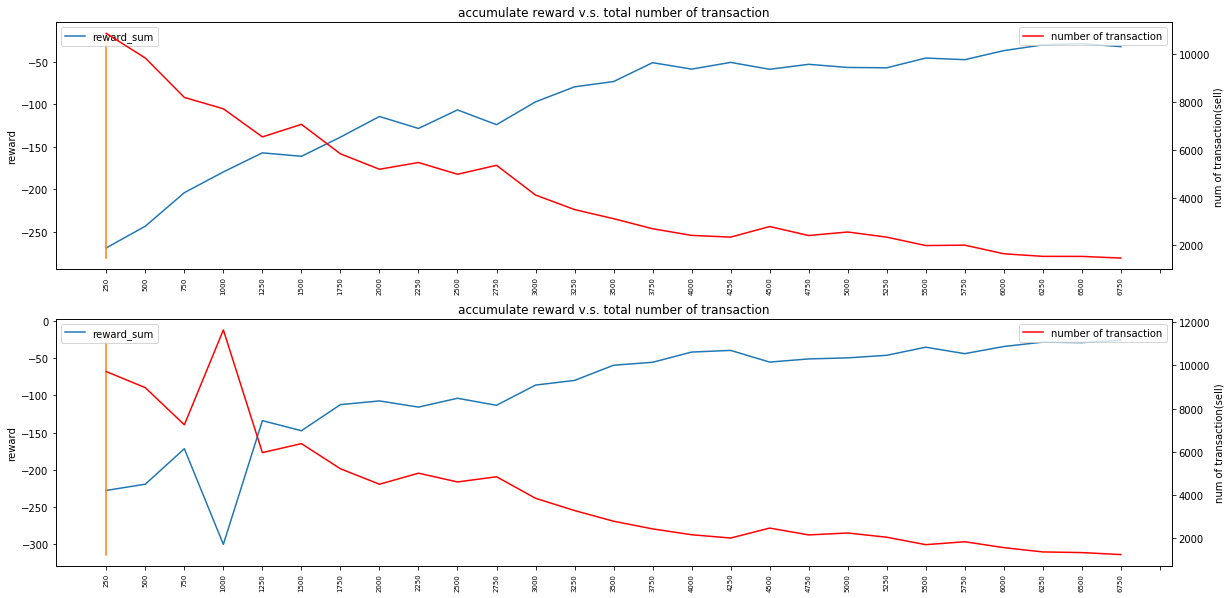

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
fig.add_subplot(211)
fig.add_subplot(212)
allaxes = fig.get_axes()
i0.plot_reward_count(allaxes[0], 250)
i1.plot_reward_count(allaxes[1], 250)
plt.show()


In [2]:
#Estimate V3 failed sell transaction rough mean reward
dft=i1.df[i1.df["valid_trans_kpi"]!=1.0]
mean_reward=((dft["sell_price"]-dft["buy_price"])/dft["buy_price"]).mean()
print (mean_reward) 
#Set the V3 fail sell transaction to rough mean reward
#i1.df.loc[i1.df["valid_trans_kpi"]!=1,"reward"]=-0.03
i1.df.loc[i1.df["valid_trans_kpi"]!=1,"reward"]=mean_reward
#View the result(adjust punishement reward to rough mean) accoumulate reward and transaction on ET
import pandas as pd
i1.df[["EvalT","reward"]].groupby(["EvalT"])["reward"].sum()
dfr = i1.df.groupby(["EvalT"]).\
            agg(reward=pd.NamedAgg(column="reward", aggfunc="sum"),
                num_trans=pd.NamedAgg(column="trans_id",aggfunc="count")
                )
dfr

-0.029721578347116747


,reward,num_trans
EvalT,,
250.0,15.141160,9713
500.0,6.460304,8968
750.0,9.838242,7252
1000.0,2.040962,11640
1250.0,10.977505,5964
1500.0,10.354435,6382
1750.0,13.405096,5217
2000.0,6.066373,4504
2250.0,9.644926,5013


In [ ]:
#eval one evalcount trans number distribution
import pandas as pd
dft=i1.df[i1.df["valid_trans_kpi"]==1.0]
dftt=dft[dft["EvalT"]==6750]
dfttt=dftt[["stock","reward"]].groupby("stock").\
            agg(reward=pd.NamedAgg(column="reward", aggfunc="sum"),
                count=pd.NamedAgg(column="reward",aggfunc="count")
                )
dfr=dfttt[dfttt["count"]>=6 ]
print (dfttt["count"].describe())
print (dfttt["count"].sum())